In [55]:
# @title Pre-processing tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [56]:
# @title Importing the Dataset

dataset = pd.read_csv("weather.csv", na_values='-')
selected_columns_indices = [2,5,8,17]
date_column_index = 0

# precipitation_column_index = 19
target_column_index = 14
# dataset.iloc[:, precipitation_column_index] = pd.to_numeric(dataset.iloc[:, precipitation_column_index].replace(['T', '-'], 0.005, errors='coerce'), errors='coerce')

# dataset.iloc[:, date_column_index] = pd.to_datetime(dataset.iloc[:, date_column_index])
# dataset['Day'] = dataset.iloc[:, date_column_index].dt.day
# dataset['Month'] = dataset.iloc[:, date_column_index].dt.month
# dataset['Year'] = dataset.iloc[:, date_column_index].dt.year

# dataset.drop(columns=[dataset.columns[date_column_index]], inplace=True)

# dataset['Day'] = dataset['Day'].astype(float)
# dataset['Month'] = dataset['Month'].astype(float)
# dataset['Year'] = dataset['Year'].astype(float)

# dataset.insert(0, 'Year', dataset.pop('Year'))
# dataset.insert(1, 'Month', dataset.pop('Month'))
# dataset.insert(2, 'Day', dataset.pop('Day'))

# dataset.iloc[:, precipitation_column_index] = dataset.iloc[:, precipitation_column_index].replace('T', 0.005).astype(float)
dataset.iloc[:, selected_columns_indices] = dataset.iloc[:, selected_columns_indices].replace('-', np.nan).astype(float)

x = dataset.iloc[:, selected_columns_indices].values
y = dataset.iloc[:, target_column_index].values



<ipython-input-56-4d7560568e93>:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, selected_columns_indices] = dataset.iloc[:, selected_columns_indices].replace('-', np.nan).astype(float)


In [ ]:
print(dataset)

In [ ]:
print(x)

In [ ]:
print(y)

In [58]:
# @title Taking Care of Missing Data
from sklearn.impute import SimpleImputer

imputer_x = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_y = SimpleImputer(missing_values=np.nan, strategy='mean')
min_index, max_index = 0, 4
imputer_x.fit(x[:, min_index:max_index])
x[:, min_index:max_index] = imputer_x.transform(x[:, min_index:max_index])
y = y.reshape(-1,1)
imputer_y.fit(y)
y = imputer_y.transform(y).flatten()

In [ ]:
print(x)

In [60]:
# @title Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [ ]:
print(x_train)

In [ ]:
print(x_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [ ]:
# # @title Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train[:, 1:18] = sc.fit_transform(x_train[:, 1:18])
# x_test[:, 1:18] = sc.transform(x_test[:, 1:18])


In [ ]:
# print(x_train)

In [ ]:
# print(x_test)

In [61]:
# @title Training the model (PolynomialRegression)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 2

poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [62]:
# @title Predicting a new result
y_pred = poly_reg.predict(x_test)

In [ ]:
print(y_pred)

In [63]:
# @title Evaluating the performance of the model
# using the mean absolute error
from sklearn.metrics import mean_absolute_error

mae_pr = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae_pr}')

Mean Absolute Error: 0.7448315152078545


In [64]:
#using the mean squared error
from sklearn.metrics import mean_squared_error
mse_pr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_pr}')

Mean Squared Error: 1.2356941610044807


In [65]:
#using the root mean squared error

rmse_pr = np.sqrt(mse_pr)
print(f'Root Mean Squared Error: {rmse_pr}')

Root Mean Squared Error: 1.1116178124717508


In [66]:
#using the R2 score
from sklearn.metrics import r2_score

r2_pr = r2_score(y_test, y_pred)
print(f'R2 Score: {r2_pr}')

R2 Score: 0.57128087500391


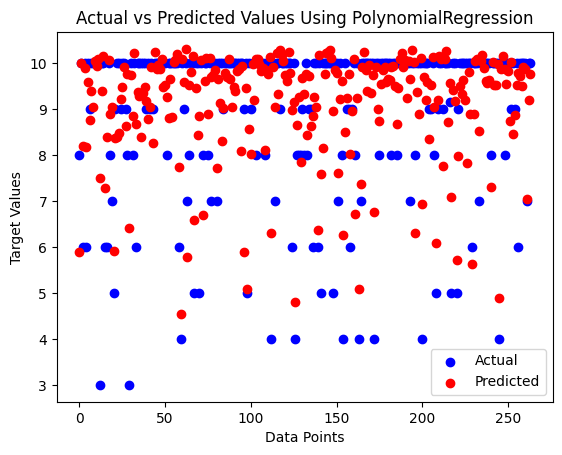

In [67]:
# @title Visualizing the results
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Values Using PolynomialRegression')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.show()

In [68]:
# @title Training RandomForestRegression model
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=4)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=4)

In [69]:
# @title Predicting new Result (testing)
y_pred_rf = regressor.predict(x_test)

In [70]:
# @title Evaluating the performance of the model
# using the mean absolute error
from sklearn.metrics import mean_absolute_error

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae_rf}')

Mean Absolute Error: 0.7702023932350062


In [71]:
#using the mean squared error
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse_rf}')

Mean Squared Error: 1.501374045939685


In [72]:
#using the root mean squared error

rmse_rf = np.sqrt(mse_rf)
print(f'Root Mean Squared Error: {rmse_rf}')

Root Mean Squared Error: 1.2253056948940069


In [73]:
#using the R2 score
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, y_pred_rf)
print(f'R2 Score: {r2_rf}')

R2 Score: 0.47910430624364897


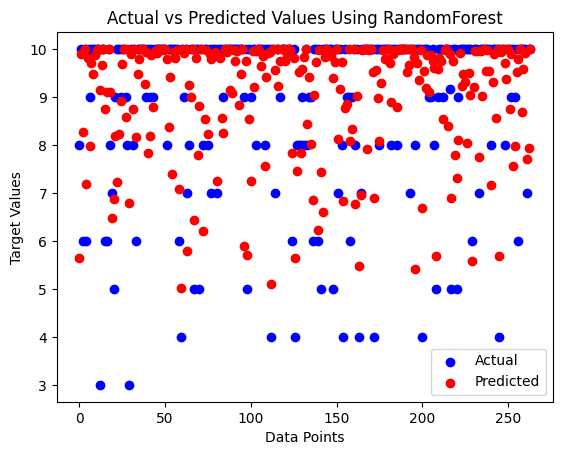

In [74]:
# @title Visualizing the results
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred_rf, color='red', label='Predicted')

plt.title('Actual vs Predicted Values Using RandomForest')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.show()